# Try reading in f_H2 from the RAMSES sim output

In [2]:
import pymses
from pymses.sources.ramses import output

pymses.RamsesOutput.amr_field_descrs_by_file = \
   {"2D": {"hydro" : [ output.Scalar("rho", 0), output.Vector("vel", [1, 2, 3]),
           output.Vector("Bl", [4,5,6]), output.Vector("Br", [7,8,9]),
           output.Scalar("P", 10),output.Scalar("Z", 11)], 
            "grav"  : [ output.Vector("g", [0, 1, 2]) ]},
   "3D": {"hydro" : [ output.Scalar("rho", 0), output.Vector("vel", [1, 2, 3]),
                      output.Scalar("P_nt", 4), output.Scalar("P", 5),
                      output.Scalar("Z", 6), 
                      output.Scalar("H",8), 
                      output.Scalar("E",9), 
                      output.Scalar("H+",10), 
                      output.Scalar("HE", 11), 
                      output.Scalar("HE+",12), 
                      output.Scalar("HE++", 13), 
                      output.Scalar("H-", 14), 
                      output.Scalar("H2", 15), 
                      output.Scalar("H2+", 16)],
       "grav"  : [ output.Vector("g", [0, 1, 2]) ]}}

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [3]:
ro = pymses.RamsesOutput("output", 28)

Computing hilbert minimal domain description for output 28 ...
Done !


In [4]:
amr = ro.amr_source(["rho", "H2"])

In [7]:
ro.info

{'H0': 67.7900009155273,
 'aexp': 0.142859270653536,
 'boxlen': 1.0,
 'dom_decomp': <pymses.sources.ramses.hilbert.HilbertDomainDecomp at 0x10481ce90>,
 'dom_decomp_Hilbert_keys': array([  0.00000000e+00,   2.78507369e+15,   5.56949132e+15,
          8.31445109e+15,   9.90062483e+15,   1.10877759e+16,
          1.31167380e+16,   1.31170099e+16,   1.31170510e+16,
          1.31170643e+16,   1.31170680e+16,   1.31170689e+16,
          1.31171029e+16,   1.31172443e+16,   1.31172785e+16,
          1.31172793e+16,   1.31172793e+16,   1.39039160e+16,
          1.39043360e+16,   1.59558003e+16,   1.80143985e+16]),
 'levelmax': 17,
 'levelmin': 8,
 'ncpu': 20,
 'ndim': 3,
 'ngridmax': 10000000,
 'nstep_coarse': 3040,
 'omega_b': 0.0450000017881393,
 'omega_k': 2.98023223876953e-08,
 'omega_l': 0.691999971866608,
 'omega_m': 0.30799999833107,
 'ordering': 'hilbert',
 'time': -5.42775606861807,
 'unit_density': (9.12671643381e-25 m^-3.kg),
 'unit_length': (1.29814589144e+23 m),
 'unit_mag': (1.4

In [9]:
from pymses.utils import constants as C
print ro.info['unit_length'].express(C.Mpc)

4.20700511246


## Just going to assume it's a galactic disk for now

In [5]:
!cat output/output_00028/*csv

In [12]:
# in box unit
center = [0.53103, 0.51031000000000004, 0.50402000000000002]
gal_radius = 0.0015
print gal_radius * ro.info['unit_length'].express(C.kpc)

gal_thickn = gal_radius/2.
gal_normal = [0.10255487134299716, 0.059509123032244614, 0.99294569974382518]

6.31050766869


# random sampling the AMR data field in a given region

In [13]:
from pymses.utils.regions import Cylinder
cyl = Cylinder(center, gal_normal, gal_radius, gal_thickn)

## generation of an array of 1E6 random points uniformaly spread w/in the cylinder, then sample the AMR field at these coord

In [16]:
cyl.random_points?

In [17]:
import numpy as np
from pymses.analysis import sample_points

points = cyl.random_points(int(1e6))
point_dset = sample_points(amr, points)

Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
Reading amr data  : output/output_00028/amr_00028.out00014
Reading hydro     : output/output_00028/hydro_00028.out00014
Reading amr data  : output/output_00028/amr_00028.out00015
Reading hydro     : output/output_00028/hydro_00028.out00015
Reading amr data  : output/output_00028/amr_00028.out00016
Reading hydro     : output/output_00028/hydro_00028.out00016
Reading amr data  : output/output_00028/amr_00028.out00017
Reading hydro     : output/output_00028/hydro_00028.out00017


/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:162: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if big_scalars_array == None:


In [18]:
point_dset.points

array([[ 0.53187114,  0.51083888,  0.50378949],
       [ 0.53245033,  0.5106047 ,  0.5036069 ],
       [ 0.53029629,  0.50977942,  0.50420622],
       ..., 
       [ 0.5311427 ,  0.5109262 ,  0.50402744],
       [ 0.52985199,  0.50974076,  0.50420038],
       [ 0.53211878,  0.51050834,  0.50416841]])

In [19]:
point_dset['rho']

array([ 158.37755712,    0.3635653 ,   30.60881345, ...,   68.6759018 ,
          1.69623628,   65.67769399])

In [20]:
import numpy as np
rho_weight_func = lambda dset: dset['rho']
r_bins = np.linspace(0, gal_radius, 200)          # 200 linearly spaced radial bins w/in cylinder radius

In [22]:
from pymses.analysis import bin_cylindrical

rho_profile = bin_cylindrical(point_dset, center, gal_normal, rho_weight_func, r_bins, divide_by_counts=True)  
# True becuase we're averaging the density field in each shell

In [26]:
%matplotlib inline

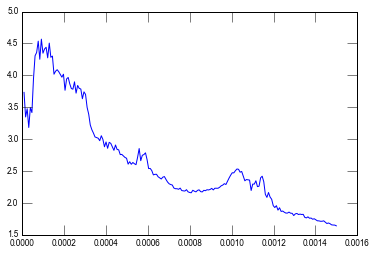

In [28]:
import pylab as plt
plt.plot(r_bins[1:], np.log10(rho_profile))

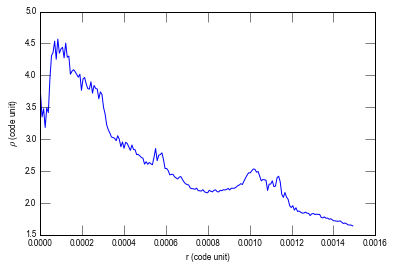

In [31]:
plt.plot(r_bins[:-1], np.log10(rho_profile))
plt.ylabel(r'$\rho$ (code unit)')
plt.xlabel('r (code unit)')

# Repeat for H2 density

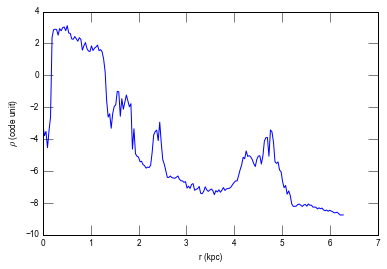

In [36]:
import numpy as np
rho_weight_func = lambda dset: dset['H2'] * dset['rho']

rho_profile = bin_cylindrical(point_dset, center, gal_normal, rho_weight_func, r_bins, divide_by_counts=True)  
# True becuase we're averaging the density field in each shell

plt.plot(r_bins[:-1]* ro.info['unit_length'].express(C.kpc), np.log10(rho_profile))
# * ro.info["unit_density"].express(C.H_cc)
plt.ylabel(r'$\rho$ (code unit)')    
plt.xlabel('r (kpc)')

In [37]:
ro.info["unit_density"].express(C.H_cc)

0.00041784966805415413

In [38]:
C.H_cc?